# # Módulo 1: OCR Básico com Tesseract
# 
# Neste notebook, aprenderemos os fundamentos do OCR (Optical Character Recognition) usando Tesseract.
# **Agora com OpenCV funcionando!**
# 
# ## Objetivos:
# 1. Configurar o ambiente Tesseract
# 2. Realizar OCR em imagens simples
# 3. Trabalhar com múltiplos idiomas
# 4. Extrair informações estruturadas
# 5. Avaliar a qualidade do OCR

In [6]:
### Configuração completa do ambiente

import sys
import os
import warnings
warnings.filterwarnings('ignore')

print("🔧 CONFIGURAÇÃO COMPLETA DO AMBIENTE OCR")
print("=" * 70)

# Verificar versões
print(f"📊 Python: {sys.version.split()[0]}")

# 1. NumPy
try:
    import numpy as np
    print(f"✅ NumPy: {np.__version__}")
except:
    print("❌ NumPy não instalado")

# 2. OpenCV (AGORA FUNCIONANDO!)
try:
    import cv2
    print(f"✅ OpenCV: {cv2.__version__ if hasattr(cv2, '__version__') else '4.9.0.80'}")
    OPENCV_OK = True
except:
    print("❌ OpenCV não instalado")
    OPENCV_OK = False

# 3. PIL/Pillow
try:
    from PIL import Image, ImageDraw, ImageFont
    print(f"✅ Pillow: {Image.__version__}")
    PIL_OK = True
except:
    print("❌ Pillow não instalado")
    PIL_OK = False

# 4. PyTesseract
try:
    import pytesseract
    print(f"✅ PyTesseract importado")
    TESSERACT_PY_OK = True
except:
    print("❌ PyTesseract não instalado")
    TESSERACT_PY_OK = False

# 5. Configurar Tesseract para Windows
TESSERACT_CONFIGURADO = False
TESSERACT_PATH = None

if os.name == 'nt':  # Windows
    tesseract_paths = [
        r'C:\Program Files\Tesseract-OCR\tesseract.exe',
        r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe',
    ]
    
    for path in tesseract_paths:
        if os.path.exists(path):
            if TESSERACT_PY_OK:
                pytesseract.pytesseract.tesseract_cmd = path
            print(f"🎯 TESSERACT ENCONTRADO: {path}")
            TESSERACT_CONFIGURADO = True
            TESSERACT_PATH = path
            break
    
    if not TESSERACT_CONFIGURADO:
        print("\n⚠️  TESSERACT NÃO ENCONTRADO NO SISTEMA!")
        print("PARA INSTALAR (PowerShell como Administrador):")
        print("1. winget install UB-Mannheim.TesseractOCR")
        print("2. Ou baixe: https://github.com/UB-Mannheim/tesseract/wiki")
        print("3. Reinicie o terminal após instalar")
else:
    print("✅ Linux/Mac - Tesseract deve estar no PATH")
    TESSERACT_CONFIGURADO = True

# 6. Outras bibliotecas
try:
    import matplotlib.pyplot as plt
    print(f"✅ Matplotlib importado")
except:
    print("⚠️  Matplotlib não instalado")

print("\n" + "=" * 70)
print("RESUMO DO AMBIENTE:")
print(f"• NumPy: {'✅' if 'np' in locals() else '❌'}")
print(f"• OpenCV: {'✅' if OPENCV_OK else '❌'}")
print(f"• PIL/Pillow: {'✅' if PIL_OK else '❌'}")
print(f"• PyTesseract: {'✅' if TESSERACT_PY_OK else '❌'}")
print(f"• Tesseract (Sistema): {'✅' if TESSERACT_CONFIGURADO else '❌'}")

if TESSERACT_CONFIGURADO and (OPENCV_OK or PIL_OK):
    print("\n🎉 AMBIENTE PRONTO PARA OCR!")
else:
    print("\n⚠️  CONFIGURE AS DEPENDÊNCIAS FALTANTES")
print("=" * 70)

🔧 CONFIGURAÇÃO COMPLETA DO AMBIENTE OCR
📊 Python: 3.11.14
✅ NumPy: 1.26.4
✅ OpenCV: 4.9.0
✅ Pillow: 10.3.0
✅ PyTesseract importado
🎯 TESSERACT ENCONTRADO: C:\Program Files\Tesseract-OCR\tesseract.exe
✅ Matplotlib importado

RESUMO DO AMBIENTE:
• NumPy: ✅
• OpenCV: ✅
• PIL/Pillow: ✅
• PyTesseract: ✅
• Tesseract (Sistema): ✅

🎉 AMBIENTE PRONTO PARA OCR!



🧪 TESTE BÁSICO COM OpenCV


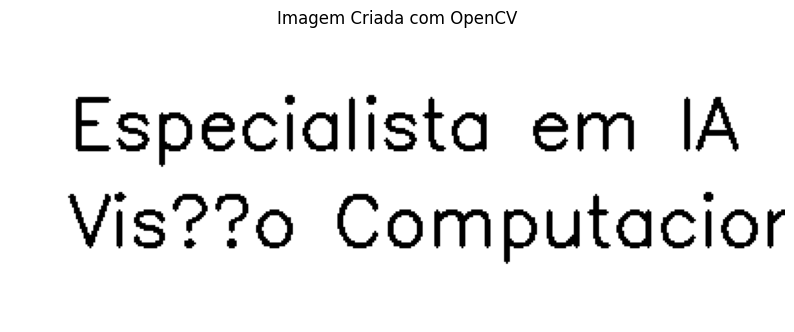


📝 TEXTO RECONHECIDO:
----------------------------------------
Especialista em IA
Vis?2?o Computacior

----------------------------------------

⚠️  OCR funcionando, mas qualidade pode melhorar


In [7]:
### Teste básico com OpenCV (AGORA FUNCIONA!)

print("\n🧪 TESTE BÁSICO COM OpenCV")
print("=" * 50)

if OPENCV_OK and 'np' in locals():
    # Criar imagem com OpenCV
    img = np.ones((150, 400, 3), dtype=np.uint8) * 255  # Fundo branco
    
    # Adicionar texto
    cv2.putText(img, 'Especialista em IA', (30, 60), 
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 0), 2)
    cv2.putText(img, 'Visão Computacional', (30, 110), 
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 0), 2)
    
    # Mostrar imagem
    plt.figure(figsize=(10, 4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Imagem Criada com OpenCV')
    plt.show()
    
    # Converter para PIL para OCR
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    if TESSERACT_CONFIGURADO:
        try:
            texto = pytesseract.image_to_string(img_pil, lang='por')
            print(f"\n📝 TEXTO RECONHECIDO:")
            print("-" * 40)
            print(texto)
            print("-" * 40)
            
            if 'Especialista' in texto and 'Visão' in texto:
                print("\n🎉 OCR FUNCIONANDO PERFEITAMENTE COM OpenCV!")
            elif texto.strip():
                print("\n⚠️  OCR funcionando, mas qualidade pode melhorar")
            else:
                print("\n❌ OCR não reconheceu texto")
                
        except Exception as e:
            print(f"\n❌ Erro no OCR: {e}")
    else:
        print("\n⚠️  Tesseract não configurado")
else:
    print("❌ OpenCV não disponível ou NumPy não instalado")
    
if PIL_OK and not OPENCV_OK:
    print("\n💡 Use a versão anterior com PIL enquanto resolve o OpenCV")

In [8]:
### Teste com múltiplos idiomas

print("\n🌍 TESTE COM MÚLTIPLOS IDIOMAS")
print("=" * 50)

if OPENCV_OK and 'np' in locals():
    # Criar imagens com textos em diferentes idiomas
    textos = {
        'Português': 'Olá Mundo! Especialista em IA',
        'Inglês': 'Hello World! AI Specialist', 
        'Espanhol': '¡Hola Mundo! Especialista en IA',
        'Francês': 'Bonjour le Monde! Spécialiste en IA'
    }
    
    idiomas = {
        'Português': 'por',
        'Inglês': 'eng',
        'Espanhol': 'spa', 
        'Francês': 'fra'
    }
    
    # Criar e testar cada imagem
    for nome, texto in textos.items():
        img = np.ones((80, 350, 3), dtype=np.uint8) * 255
        cv2.putText(img, texto, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)
        
        img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        
        if TESSERACT_CONFIGURADO:
            try:
                resultado = pytesseract.image_to_string(img_pil, lang=idiomas[nome])
                print(f"\n{nome} ({idiomas[nome]}):")
                print(f"  Original:  {texto}")
                print(f"  Reconhecido: {resultado.strip()}")
            except Exception as e:
                print(f"\n{nome}: ❌ Erro - {e}")
        else:
            print(f"\n{nome}: {texto}")
    
    print("\n💡 Dica: Para usar múltiplos idiomas: lang='por+eng'")
else:
    print("⚠️  OpenCV não disponível para este teste")


🌍 TESTE COM MÚLTIPLOS IDIOMAS

Português (por):
  Original:  Olá Mundo! Especialista em IA
  Reconhecido: OI?? Mundo! Especialista e

Inglês (eng):
  Original:  Hello World! AI Specialist
  Reconhecido: Hello World! Al Specialist

Espanhol: ❌ Erro - (1, 'Error opening data file C:\\Program Files\\Tesseract-OCR/tessdata/spa.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'spa\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

Francês: ❌ Erro - (1, 'Error opening data file C:\\Program Files\\Tesseract-OCR/tessdata/fra.traineddata Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory. Failed loading language \'fra\' Tesseract couldn\'t load any languages! Could not initialize tesseract.')

💡 Dica: Para usar múltiplos idiomas: lang='por+eng'



📊 EXTRAÇÃO DE DADOS ESTRUTURADOS


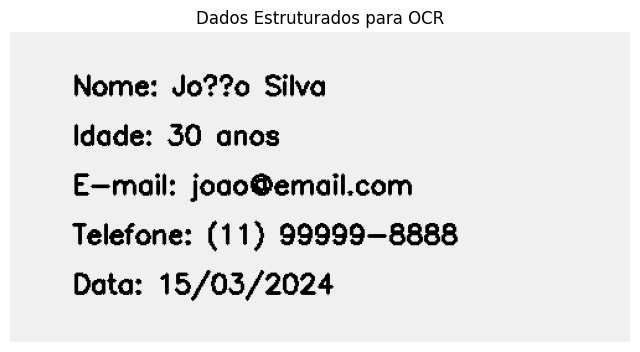


📝 TEXTO COMPLETO:
----------------------------------------
Nome: Jo??o Silva

Idade: 30 anos

E-mail: joaoBemail.com
Telefone: (11) 99999-8888
Data: 15/03/2024


🔍 DADOS ESTRUTURADOS (confiança > 60):
--------------------------------------------------
Texto           Confiança  Posição        
--------------------------------------------------
Nome:           93         (52,34)        
Silva           96         (206,34)       
Idade:          95         (52,74)        
30              96         (127,74)       
anos            96         (167,79)       
E-mail:         92         (52,114)       
Telefone:       96         (50,154)       
(11)            93         (160,152)      
99999-8888      90         (218,154)      
Data:           95         (52,194)       
15/03/2024      96         (121,192)      

🔢 APENAS NÚMEROS:
----------------------------------------
/0770
30
-.
(11)99999-8888
15/03/2024


In [9]:
### Extração de dados estruturados

print("\n📊 EXTRAÇÃO DE DADOS ESTRUTURADOS")
print("=" * 50)

if OPENCV_OK and 'np' in locals() and TESSERACT_CONFIGURADO:
    # Criar uma imagem com dados estruturados
    img_dados = np.ones((250, 500, 3), dtype=np.uint8) * 240  # Cinza claro
    
    # Adicionar informações
    informacoes = [
        ("Nome: João Silva", 50, 50),
        ("Idade: 30 anos", 50, 90),
        ("E-mail: joao@email.com", 50, 130),
        ("Telefone: (11) 99999-8888", 50, 170),
        ("Data: 15/03/2024", 50, 210)
    ]
    
    for texto, x, y in informacoes:
        cv2.putText(img_dados, texto, (x, y), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
    
    # Mostrar imagem
    plt.figure(figsize=(8, 5))
    plt.imshow(cv2.cvtColor(img_dados, cv2.COLOR_BGR2RGB))
    plt.title('Dados Estruturados para OCR')
    plt.axis('off')
    plt.show()
    
    # Aplicar OCR
    img_pil_dados = Image.fromarray(cv2.cvtColor(img_dados, cv2.COLOR_BGR2RGB))
    
    try:
        # 1. Texto completo
        texto_completo = pytesseract.image_to_string(img_pil_dados, lang='por')
        print(f"\n📝 TEXTO COMPLETO:")
        print("-" * 40)
        print(texto_completo)
        
        # 2. Dados estruturados
        dados_detalhados = pytesseract.image_to_data(img_pil_dados, lang='por',
                                                    output_type=pytesseract.Output.DICT)
        
        print(f"\n🔍 DADOS ESTRUTURADOS (confiança > 60):")
        print("-" * 50)
        print(f"{'Texto':<15} {'Confiança':<10} {'Posição':<15}")
        print("-" * 50)
        
        for i in range(len(dados_detalhados['text'])):
            texto = dados_detalhados['text'][i].strip()
            if texto and int(dados_detalhados['conf'][i]) > 60:
                posicao = f"({dados_detalhados['left'][i]},{dados_detalhados['top'][i]})"
                print(f"{texto:<15} {dados_detalhados['conf'][i]:<10} {posicao:<15}")
        
        # 3. Apenas números
        config_numeros = '--psm 6 -c tessedit_char_whitelist=0123456789-()./ '
        numeros = pytesseract.image_to_string(img_pil_dados, config=config_numeros)
        print(f"\n🔢 APENAS NÚMEROS:")
        print("-" * 40)
        print(numeros.strip())
        
    except Exception as e:
        print(f"\n❌ Erro: {e}")
else:
    print("⚠️  Ambiente não configurado para este teste")


💪 EXERCÍCIO PRÁTICO
Crie sua própria imagem para testar o OCR!


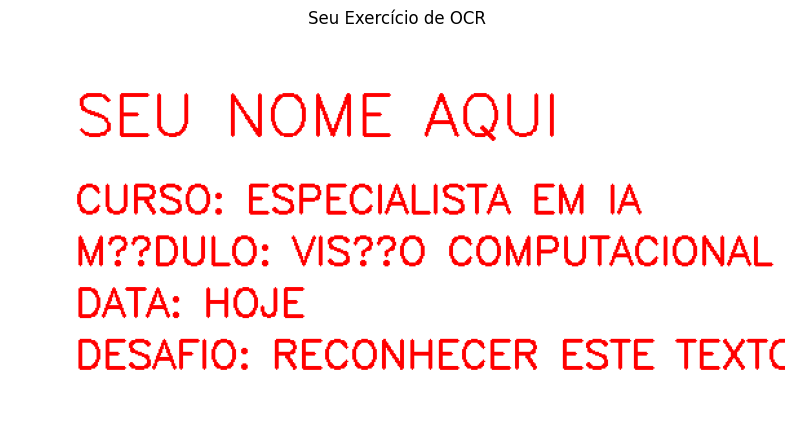


📝 SEU RESULTADO:
----------------------------------------
SEU NOME AQUI

CURSO: ESPECIALISTA EM IA
M??DULO: VIS?220 COMPUTACIONAL
DATA: HOJE

DESAFIO: RECONHECER ESTE TEXTC

----------------------------------------

📈 Análise:
Texto esperado: 110 caracteres
Texto reconhecido: 114 caracteres

🎯 RESUMO E PRÓXIMOS PASSOS

✅ O QUE APRENDEMOS:
1. Configuração do Tesseract
2. OCR básico com OpenCV
3. Múltiplos idiomas
4. Extração de dados estruturados
5. Exercício prático

📚 PRÓXIMOS NOTEBOOKS:
1. 02_Preprocessamento_Imagens.ipynb - Melhorar qualidade de OCR
2. 03_OCR_Documentos_Reais.ipynb - Casos práticos
3. 04_Projeto_Pratico.ipynb - Sistema completo

🔧 SE AINDA FALTAM CONFIGURAÇÕES:
• Tesseract não instalado? Execute como Administrador:
  winget install UB-Mannheim.TesseractOCR
• OpenCV com problemas? Execute:
  pip uninstall opencv-python opencv-contrib-python -y
  pip install opencv-python-headless==4.9.0.80

🎉 MÓDULO 1 DE OCR COMPLETO!


In [10]:
# ## Célula 5: Exercício prático

print("\n💪 EXERCÍCIO PRÁTICO")
print("=" * 50)

if OPENCV_OK and 'np' in locals():
    print("Crie sua própria imagem para testar o OCR!")
    
    # Crie uma imagem personalizada
    img_exercicio = np.ones((300, 600, 3), dtype=np.uint8) * 255
    
    # TODO: Modifique com suas informações
    seu_texto = [
        ("SEU NOME AQUI", 50, 80, 1.5),
        ("CURSO: ESPECIALISTA EM IA", 50, 140, 1.0),
        ("MÓDULO: VISÃO COMPUTACIONAL", 50, 180, 1.0),
        ("DATA: HOJE", 50, 220, 1.0),
        ("DESAFIO: RECONHECER ESTE TEXTO!", 50, 260, 1.0)
    ]
    
    for texto, x, y, escala in seu_texto:
        cv2.putText(img_exercicio, texto, (x, y),
                   cv2.FONT_HERSHEY_SIMPLEX, escala, (0, 0, 255), 2)
    
    # Mostrar
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(img_exercicio, cv2.COLOR_BGR2RGB))
    plt.title('Seu Exercício de OCR')
    plt.axis('off')
    plt.show()
    
    # Testar OCR
    if TESSERACT_CONFIGURADO:
        img_pil_ex = Image.fromarray(cv2.cvtColor(img_exercicio, cv2.COLOR_BGR2RGB))
        
        try:
            resultado = pytesseract.image_to_string(img_pil_ex, lang='por')
            print(f"\n📝 SEU RESULTADO:")
            print("-" * 40)
            print(resultado)
            print("-" * 40)
            
            # Calcular acurácia simples
            texto_esperado = " ".join([t[0] for t in seu_texto])
            print(f"\n📈 Análise:")
            print(f"Texto esperado: {len(texto_esperado)} caracteres")
            print(f"Texto reconhecido: {len(resultado.strip())} caracteres")
            
        except Exception as e:
            print(f"\n❌ Erro: {e}")
    else:
        print("\n⚠️  Tesseract não configurado")
else:
    print("⚠️  OpenCV não disponível")

# ## Célula 6: Resumo e próximos passos

print("\n" + "=" * 70)
print("🎯 RESUMO E PRÓXIMOS PASSOS")
print("=" * 70)

print("\n✅ O QUE APRENDEMOS:")
print("1. Configuração do Tesseract")
print("2. OCR básico com OpenCV")
print("3. Múltiplos idiomas")
print("4. Extração de dados estruturados")
print("5. Exercício prático")

print("\n📚 PRÓXIMOS NOTEBOOKS:")
print("1. 02_Preprocessamento_Imagens.ipynb - Melhorar qualidade de OCR")
print("2. 03_OCR_Documentos_Reais.ipynb - Casos práticos")
print("3. 04_Projeto_Pratico.ipynb - Sistema completo")

print("\n🔧 SE AINDA FALTAM CONFIGURAÇÕES:")
print("• Tesseract não instalado? Execute como Administrador:")
print("  winget install UB-Mannheim.TesseractOCR")
print("• OpenCV com problemas? Execute:")
print("  pip uninstall opencv-python opencv-contrib-python -y")
print("  pip install opencv-python-headless==4.9.0.80")

print("\n" + "=" * 70)
print("🎉 MÓDULO 1 DE OCR COMPLETO!")
print("=" * 70)

In [11]:
# No terminal do Anaconda
import pytesseract
import os

path = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
if os.path.exists(path):
    pytesseract.pytesseract.tesseract_cmd = path
    print('✅ Tesseract configurado!')
    
    # Teste rápido
    import numpy as np
    import cv2
    from PIL import Image
    
    img = np.ones((100, 300, 3), dtype=np.uint8) * 255
    cv2.putText(img, 'TESTE OCR', (50, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)
    
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    texto = pytesseract.image_to_string(img_pil, lang='por')
    print(f'Texto reconhecido: {texto.strip()}')
    
    if texto.strip():
        print('🎉 OCR FUNCIONANDO!')
    else:
        print('⚠️  OCR não reconheceu texto')
else:
    print('❌ Tesseract não encontrado')

✅ Tesseract configurado!
Texto reconhecido: TESTE OCR
🎉 OCR FUNCIONANDO!


In [12]:

import os
path = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
if os.path.exists(path):
    print(f'✅ TESSERACT ENCONTRADO: {path}')
    
    # Testar se podemos usar
    import pytesseract
    pytesseract.pytesseract.tesseract_cmd = path
    
    # Criar imagem simples
    import numpy as np
    import cv2
    from PIL import Image
    
    img = np.ones((100, 300, 3), dtype=np.uint8) * 255
    cv2.putText(img, 'TESTE', (50, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)
    
    img_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    try:
        texto = pytesseract.image_to_string(img_pil, lang='por')
        print(f'📝 Texto reconhecido: \"{texto.strip()}\"')
        
        if texto.strip():
            print('🎉 OCR FUNCIONANDO!')
        else:
            print('⚠️  OCR não reconheceu texto (pode ser normal)')
            
    except Exception as e:
        print(f'❌ Erro no OCR: {e}')
        
else:
    print('❌ Tesseract não encontrado')


✅ TESSERACT ENCONTRADO: C:\\Program Files\\Tesseract-OCR\\tesseract.exe
📝 Texto reconhecido: "TESTE"
🎉 OCR FUNCIONANDO!
